# Project 2: Wrangling And Analyzing Of WeRateDogs Data

# Introduction:

>This dataset comprises of over 2k tweets from a twitter user '@dog_rates', also known as 'WeRateDogs'.
>weRateDogs is a twitter account with over 4million followers and has recieved international media coverage, which focuses on rating people's dogs with a humorous comment about the dogs to it's followers.
>
>This Dataset comprises of some notable columns such as;
>
>**Tweet ID**
>
>**Timestamp**
>
>**Tweet Text**
>
>**Retweet_Count**
>
>**Favorite_Count**
>
>**Source**
>
>etc
>
## One of the sole purpose of this analysis, is to clean, analyze and find some important trends and patterns through the data, such as;
>
>1.	What are the total number of each dogs in the dog_stage column?
>
>2.	What is the average rating of each dog in the dog_stage?
>
>3.	What is the total count of retweets on each rating?
>
>4.	What is the total count of favorite on each rating?
>
>5.	Is there any correlation between any of the variables?


In [1]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import requests as rt
import os
import json
import tweepy
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs 

# Data Wrangling


### Gathering Data
>
>I'm required to gather the data for this project from three **(3)** different sources, namely;
>
>**WeRateDogs Twitter Archive**
>
>**Tweet Image Prediction**
>
>**Twitter API**

#### WeRateDogs Twitter Archive
>
>This data have been dowloaded directly from the source and saved directly in my system as "twitter_archieved_enhanced.csv", which I'm going load into a pandas dataframe.

In [2]:
# Loading the data into pandas dataframe
archive_data = pd.read_csv('twitter-archive-enhanced.csv')

#### Tweet Image Prediction
>
>This file is hosted on udacity's server, which I will be downloading programmatically using the Python Request Package and the udacity's server url.

In [3]:
# Creating an 'image_data' folder using the 'os' package
folder = 'image_data'
if not os.path.exists(folder):
    os.makedirs(folder)

In [4]:
# url source hosting the data
source = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#Using the python "Request" package in getting the data
output = rt.get(source)

In [5]:
# Extracting the data and savingb it in the 'image_folder'
with open(os.path.join(folder, source.split('/')[-1]), 'wb') as file:
    file.write(output.content)

In [6]:
# Lists the content of the 'image_data' folder
os.listdir(folder)

In [7]:
# Loading the file into pandas dataframe
image_data = pd.read_csv('image_data/image-predictions.tsv', sep="\t")

#### Twitter API
>
>I'm to query the Twitter API for each tweet's JSON data using the Python's Tweepy package and store it's data in the 'tweet_json.text' file.

In [8]:
# Twitter access keys and tokens
con_key = 'avZBF***************u0REw'
con_sec = '3My49CYkX**************************Fua9hndPZpFFXQW'
acs_key = '2325158768-XqY*****************************RmbE4KX'
acs_sec = 'YslEm5************************jDt4rpYbRVg7DHC'


# authenticating the access keys and tokens
auth = tweepy.OAuth1UserHandler(con_key, con_sec)
auth.set_access_token(acs_key, acs_sec)


api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# This will save each returned JSON tweet as a new line in a .txt file
with open('tweet_json.txt', encoding='utf-8') as file:
    for tweet_id in archive_data['tweet_id']:
        try:
            tweet = api.get_status(id = tweet_id, tweet_mode='extended')
            file.write(json.dump(tweet))
            file.write('\n')
        except:
            pass
file.close()

In [10]:
# Converting the json data in the 'tweet_json' file into dictionary
with open('tweet_json.txt') as df_file:
    data = []
    for line in df_file:
        data.append(json.loads(line))

In [11]:
# Print the first data in the dictionary
print(data[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [12]:
# Converting the data from dictionary to pandas dataframe
data = pd.DataFrame(data, columns=['id','retweet_count','favorite_count'])

In [13]:
# Saving the data in a CSV file
data.to_csv('api_data.csv', index=False)

In [14]:
api_data = pd.read_csv('api_data.csv')

### Assessing Data
>
>This data will be assessed **Visually and Programmatically** for quality and tidiness issues.
>
#### Visual Assessment

#### Archive data Assessment

In [15]:
# Assessing the first 5 rows of the data
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
# Assessing the last 5 rows of the data
archive_data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
# Assessing a random 5 rows of the data
archive_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
117,870063196459192321,NaN,NaN,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,None,None,None,None
1548,689275259254616065,NaN,NaN,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,None,None,None,None
1341,704847917308362754,NaN,NaN,2016-03-02 01:56:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hi could I get a number 4 with no pickles...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/704847917...,12,10,None,None,None,None,None
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,None,None,None,None
1100,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*faints* 12/10 perfection in pupper form https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735648611...,12,10,None,None,None,pupper,None


#### Image data Assessment

In [18]:
# Assessing the first 5 rows of the data
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Assessing the last 5 rows of the data
image_data.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
# Assessing a random 5 rows of the data
image_data.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
1650,809220051211603969,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,Pomeranian,0.819511,True,Samoyed,0.141241,True,Pembroke,0.013455,True
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True


#### API data Assessment

In [21]:
# Assessing the first 5 rows of the data
api_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [22]:
# Assessing the last 5 rows of the data
api_data.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [23]:
# Assessing a random 5 rows of the data
api_data.sample(5)

,id,retweet_count,favorite_count
576,800855607700029440,1889,0
1526,690348396616552449,573,1644
1234,712438159032893441,1756,5799
732,781308096455073793,2961,7973
1524,690374419777196032,972,3560


### Programmatical Assessment
>
>Using the Pandas functions and methods to assess each of the dataset
>
#### Archive Data 

In [24]:
# Checking the data shape
archive_data.shape

(2356, 17)

In [25]:
# Checking the data info
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
# rating_numerator statistical function
archive_data['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [27]:
# rating_denominator statistical function
archive_data['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [28]:
# Rating numerator less than the rating denominator (10)
archive_data[archive_data['rating_numerator'] < 10].count()[0]

440

In [29]:
# Rating denominator less than 10
archive_data[archive_data['rating_denominator'] < 10].count()[0]

3

In [30]:
# Rating denominator greater than 10
archive_data[archive_data['rating_denominator'] > 10].count()[0]

20

In [31]:
# sum of duplicate function
def dup(dsum):
    # Checking for any duplicated tweet_id
    return dsum.duplicated().sum()



dup(archive_data['tweet_id'])

0

In [32]:
# Value count function
def vcount(name):
    # Counts of rating_numerator
    return name.value_counts()

        
vcount(archive_data['rating_numerator'])

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [33]:
# Counts of rating_denominator
vcount(archive_data['rating_denominator'])

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

#### Image Data Assessment

In [34]:
# Checking the data shape
image_data.shape

(2075, 12)

In [35]:
# Checking the data info
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# Checking for any duplicated tweet_id
dup(image_data['tweet_id'])

0

In [37]:
# Checking for any duplicated jgp_url
dup(image_data['jpg_url'])

66

In [38]:
# Counts of p1_dog column
vcount(image_data['p1_dog'])

True     1532
False     543
Name: p1_dog, dtype: int64

In [39]:
# Counts of p2_dog column
vcount(image_data['p2_dog'])

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
# Counts of p3_dog column
vcount(image_data['p3_dog'])

True     1499
False     576
Name: p3_dog, dtype: int64

In [41]:
# Counts of img_num column
vcount(image_data['img_num'])

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### API Data Assessment

In [42]:
# Checking the data shape
api_data.shape

(2354, 3)

In [43]:
# Checking the data info
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [44]:
# Checking for duplicate id
dup(api_data['id'])

0

### Cleanning Data
>
>In this section, I will clean the data to ensure that it is good enough to carry out my analysis, which I listed all the issues I noticed during the process of assessing the data.
>
  #### Define:
>
>**Quality (Completeness, Validity, accuracy, Consistency)**
>
>>**Archive Data**
>>>
>>> * Only original ratings with images are need (no retweets)
>>>
>>> * Expand the timestamp column to Date and Time seperate columns
>>>
>>> * Lenghty tweet_id characters
>>>
>>> * Incomplete/invalid characters in the Name column
>>>
>>> * Invalid ratings on 'rating_numerator' and 'rating_denominator' columns
>>>
>>> * Drop all un-usefull columns
>>>
>>
>>**Image Data**
>>> * Drop duplicated jpg_url
>>>
>>> * Invalid characters in p1, p2 and p3 columns respectively
>>>
>>> * Lenghty tweet_id characters
>>>
>>> * Inconsistency of name-case in the p1, p2 and p3 columns
>>
>>**API Data**
>>> * Lenghty id characters
>>>
>>> * Change the id column name
>>
>**Tidiness**
>> * Related datasets
>>
>> * Merge the doggo, floofer, pupper and puppo columns together

In [45]:
# Copy of all datasets
archive_data1 = archive_data.copy()
image_data1 = image_data.copy()
api_data1 = api_data.copy()

#### Coding and Testing
>
> **Archive Data**
>>
>>**Only original ratings with images are need (no retweets)**
>>>
>>> I dropped all the retweet related columns since only the original tweets with image and ratings are needed

In [46]:
# Delete the retweet related columns
columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
archive_data1.drop(columns, axis = 1, inplace = True)

# Test
archive_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  doggo                  2356 non-null   object 
 11  floofer                2356 non-null   object 
 12  pupper                 2356 non-null   object 
 13  puppo                  2356 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ 

**Expand the timestamp column to Date and Time seperate columns**
>
> I seperated the Timestamp column into two columns comprising of Date and Time

In [47]:
# Date column
archive_data1['date'] = pd.to_datetime(archive_data1['timestamp']).dt.date

# Time column
archive_data1['time'] = pd.to_datetime(archive_data1['timestamp']).dt.time

# Test
archive_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  doggo                  2356 non-null   object 
 11  floofer                2356 non-null   object 
 12  pupper                 2356 non-null   object 
 13  puppo                  2356 non-null   object 
 14  date                   2356 non-null   object 
 15  time

**Lenghty tweet_id characters**
>>
>> I shorthend the lenght of the tweet_id to the first 7 characters for easy and fast recognition

In [48]:
# Extracting the first 7 letters
archive_data1['tweet_id'] = archive_data1['tweet_id'].astype(str).str[:7]
archive_data1['tweet_id'] = archive_data1['tweet_id'].astype('int64')


# Test
archive_data1['tweet_id'].head()

0    8924206
1    8921774
2    8918151
3    8916895
4    8913275
Name: tweet_id, dtype: int64

**Incomplete/invalid characters in the Name column**
>
> Some of the rows in the 'name' column contains what seems to be an invalid name for the dogs, ranging from 'a', 'an, 'None', etc. So I converted all the invalid characters in the 'name' column to 'NaN' values

In [49]:
# Convert all invalid characters to NaN
archive_data1['name'] = archive_data1['name'].replace(regex=['^[a-z]+','None'], value = np.nan)


# Test
archive_data1['name'].sample(10)

1417      Claude
1691     Glacier
2143       Julio
477         Jack
2353         NaN
2083      Maggie
631        Laika
422     Hercules
1670     Patrick
2088      Antony
Name: name, dtype: object

**Merge the doggo, floofer, pupper and puppo columns together**
>
> Having the dog names in seperate columns isn't necessary, so I merged them together to form a new column 'dog_stage'

In [50]:
# Creating the dog_stage column
archive_data1['dog_stage'] = archive_data1['text'].str.extract("(doggo|floofer|pupper|puppo)")

# Test
archive_data1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time', 'dog_stage'],
      dtype='object')

**Invalid rating on 'rating_numerator' and 'rating_denominator' columns**
>
> Going by the standard form of ratings, numerator is to be greater than the denominator. After going through the archive_data1 dataset, I noticed there are some rows with an incorrect ratings in the 'rating_numerator' and 'rating_denominator' column.
>
> In conclusion, I dropped all the rows in the 'rating_denominator' column having less-than or greater-than '10' as it's rating.
>
> I also dropped all rows in the 'rating_numerator' column having less-than '10' as it's rating, since our rating denominator is '10'

In [51]:
archive_data1 = archive_data1[(archive_data1['rating_denominator'] == 10) & (archive_data1['rating_numerator'] >= 10)]


archive_data1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,8924206,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56,NaN
1,8921774,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27,NaN
2,8918151,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03,NaN
3,8916895,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51,NaN
4,8913275,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24,NaN


In [52]:
archive_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2350
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1899 non-null   int64  
 1   in_reply_to_status_id  62 non-null     float64
 2   in_reply_to_user_id    62 non-null     float64
 3   timestamp              1899 non-null   object 
 4   source                 1899 non-null   object 
 5   text                   1899 non-null   object 
 6   expanded_urls          1853 non-null   object 
 7   rating_numerator       1899 non-null   int64  
 8   rating_denominator     1899 non-null   int64  
 9   name                   1241 non-null   object 
 10  doggo                  1899 non-null   object 
 11  floofer                1899 non-null   object 
 12  pupper                 1899 non-null   object 
 13  puppo                  1899 non-null   object 
 14  date                   1899 non-null   object 
 15  time

**Drop all un-usefull columns**
>
> There seems to be some un-usefull columns which are no more needed, so I deleted them.

In [53]:
column = ['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo']

archive_data1.drop(column, axis = 1, inplace = True)


archive_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2350
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1899 non-null   int64 
 1   source              1899 non-null   object
 2   text                1899 non-null   object
 3   rating_numerator    1899 non-null   int64 
 4   rating_denominator  1899 non-null   int64 
 5   name                1241 non-null   object
 6   date                1899 non-null   object
 7   time                1899 non-null   object
 8   dog_stage           337 non-null    object
dtypes: int64(3), object(6)
memory usage: 148.4+ KB


**Image Data**
>
>**Drop duplicated jpg_url**
>>
>> I deleted all the duplicated rows in the 'jpg_url' column

In [54]:
# Delete duplicated rows
image_data1 = image_data1.drop_duplicates('jpg_url', keep='first')

# Test
image_data1['jpg_url'].duplicated().sum()

0

**Invalid characters in p1, p2 and p3 columns respectively**
>
> I removed all the special characters ( _ ) in listed columns and replaced it with a space for better readability

In [55]:
# Replaced '_' with a space
image_data1['p1'] = image_data1['p1'].str.replace('_', ' ')
image_data1['p2'] = image_data1['p2'].str.replace('_', ' ')
image_data1['p3'] = image_data1['p3'].str.replace('_', ' ')

# Test
image_data1[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


**Lenghty tweet_id characters**
>
> I trimmed the 'tweet_id' column characters to be the first 7 characters for easy recognition

In [56]:
# Converting the 'tweet_id' column to strings and extracting the first 7 letters
image_data1['tweet_id'] = image_data1['tweet_id'].astype(str).str[:7]

# Converting the 'tweet_id' column back to integer datatype
image_data1['tweet_id'] = image_data1['tweet_id'].astype('int64')

# Test
image_data1['tweet_id'].head()

0    6660208
1    6660292
2    6660334
3    6660442
4    6660492
Name: tweet_id, dtype: int64

**Inconsistency of name-case in the p1 column**
>
> The p1, p2 and p3 columns seems to be inconsistence in the named-casing as some of the letters starts with an upper-case, while others with lower-case.
>
> So I changed all the letters to be consistence by starting with upper-case letter

In [57]:
# Capitalizing the first letters in the p1, p2 and p3 columns
image_data1['p1'] = image_data1['p1'].str.capitalize()
image_data1['p2'] = image_data1['p2'].str.capitalize()
image_data1['p3'] = image_data1['p3'].str.capitalize()


# Test
image_data1[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,Collie,Shetland sheepdog
1,Redbone,Miniature pinscher,Rhodesian ridgeback
2,German shepherd,Malinois,Bloodhound
3,Rhodesian ridgeback,Redbone,Miniature pinscher
4,Miniature pinscher,Rottweiler,Doberman


**API Data**
>
>**Lenghty id characters**
>>
>> I trimmed the 'id' column characters to be the first 7 characters for easy recognition

In [58]:
# Converting the 'id' column to strings and extracting the first 7 letters
api_data1['id'] = api_data1['id'].astype(str).str[:7]

# Converting the 'id' column back to integer datatype
api_data1['id'] = api_data1['id'].astype('int64')


# Test
api_data1['id'].head()

0    8924206
1    8921774
2    8918151
3    8916895
4    8913275
Name: id, dtype: int64

**Change the id column name**
>
> I changed the 'id' column name to 'tweet_id'

In [59]:
# Rename the 'id' column
api_data1 = api_data1.rename(columns={'id':'tweet_id'})


# Test
api_data1.head()

,tweet_id,retweet_count,favorite_count
0,8924206,8853,39467
1,8921774,6514,33819
2,8918151,4328,25461
3,8916895,8964,42908
4,8913275,9774,41048


In [60]:
archive_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2350
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1899 non-null   int64 
 1   source              1899 non-null   object
 2   text                1899 non-null   object
 3   rating_numerator    1899 non-null   int64 
 4   rating_denominator  1899 non-null   int64 
 5   name                1241 non-null   object
 6   date                1899 non-null   object
 7   time                1899 non-null   object
 8   dog_stage           337 non-null    object
dtypes: int64(3), object(6)
memory usage: 148.4+ KB


In [61]:
api_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [62]:
image_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


**Tidiness**
>
>**Related Dataset**
>>
>> Having seen that all the three datasets are related, I merged them together to form a single dataset

In [63]:
# Merging the three datasets together
dog = pd.merge(image_data1, api_data1, on = 'tweet_id', how = 'left')

dog1 = pd.merge(dog, archive_data1, on = 'tweet_id', how = 'left')


# Test
dog1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweet_count,favorite_count,source,text,rating_numerator,rating_denominator,name,date,time,dog_stage
0,6660208,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,...,532.0,2535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6660292,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,...,48.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6660334,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,47.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6660442,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,...,147.0,311.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6660492,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,41.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
dog1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2009 non-null   int64  
 1   jpg_url             2009 non-null   object 
 2   img_num             2009 non-null   int64  
 3   p1                  2009 non-null   object 
 4   p1_conf             2009 non-null   float64
 5   p1_dog              2009 non-null   bool   
 6   p2                  2009 non-null   object 
 7   p2_conf             2009 non-null   float64
 8   p2_dog              2009 non-null   bool   
 9   p3                  2009 non-null   object 
 10  p3_conf             2009 non-null   float64
 11  p3_dog              2009 non-null   bool   
 12  retweet_count       2008 non-null   float64
 13  favorite_count      2008 non-null   float64
 14  source              1580 non-null   object 
 15  text                1580 non-null   object 
 16  rating

### After merging the three datasets into one dataset, the listed Quality issues below was discovered;
>
> * Numerious NaN values
>
> * Invalid datatypes on numerious columns

**Numerious NaN values**
>
> Due to the numerious NaN values, I extracted only original tweets that has an image, using the 'jpg_url' column.

In [65]:
# Extracting original status with images
df_dogs = dog1[dog1['jpg_url'].notnull()]

# Test
df_dogs.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweet_count,favorite_count,source,text,rating_numerator,rating_denominator,name,date,time,dog_stage
0,6660208,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,...,532.0,2535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6660292,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,...,48.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6660334,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,47.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6660442,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,...,147.0,311.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6660492,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,41.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Invalid datatypes on numerious columns**
>
> I changed all the affected columns with wrong datatype to it's appropriate datatype

In [66]:
# Changed the p1_dog, p2_dog, p3_dog column datatype
df_dogs[['p1_dog', 'p2_dog', 'p3_dog']] = df_dogs[['p1_dog', 'p2_dog', 'p3_dog']].astype('boolean')

# Chenging the 'img_num' datatype
df_dogs['img_num'].astype('int64')

# Changed the date column datatype
df_dogs['date'] = pd.to_datetime(df_dogs['date'])

# Changed the time column datatype
df_dogs['time'] = pd.to_datetime(df_dogs['time'], format = '%H:%M:%S')


# Test
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2009 non-null   int64         
 1   jpg_url             2009 non-null   object        
 2   img_num             2009 non-null   int64         
 3   p1                  2009 non-null   object        
 4   p1_conf             2009 non-null   float64       
 5   p1_dog              2009 non-null   boolean       
 6   p2                  2009 non-null   object        
 7   p2_conf             2009 non-null   float64       
 8   p2_dog              2009 non-null   boolean       
 9   p3                  2009 non-null   object        
 10  p3_conf             2009 non-null   float64       
 11  p3_dog              2009 non-null   boolean       
 12  retweet_count       2008 non-null   float64       
 13  favorite_count      2008 non-null   float64     

**After cleaning, I saved the data in a new CSV file for easy future reference, as the dataset is now clean and ready for the Exploratory Data Analysis**

In [67]:
# Exporting to a csv file
df_dogs.to_csv('twitter_archive_master.csv', index = False)

## Exploratory Data Analysis
>
>
>### Findings, Visualization and Communication
>
> In this section, I carried out an Exploratory Analysis to identify patterns and trends in the data

### Research Question 1:
>
>**What are the total number of each dogs in the dog_stage column?**

In [68]:
# Total count of dog stage
vcd = vcount(df_dogs['dog_stage'])

# Test
vcd

pupper     176
doggo       66
puppo       27
floofer      3
Name: dog_stage, dtype: int64

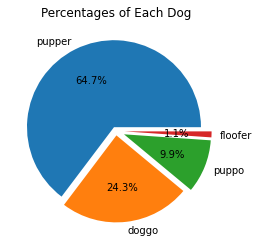

In [69]:
# Pi chart of the dog_stage counts
vcd.plot(kind='pie', ylabel = '', autopct='%1.1f%%', explode = (0.05, 0.05, 0.1, 0.1))
plt.title('Percentages of Each Dog');

**This shows that 'Pupper' has the highest category of dogs in the dog_stage column, followed by 'Doggo', while 'Floofer' has the least number of dogs** 

### Research Question 2:
>
>**What is the average rating of each dog in the dog_stage?**

In [70]:
# Grouping the dog stage by rating
df_dogs.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.954545
floofer    12.666667
pupper     11.375000
puppo      12.259259
Name: rating_numerator, dtype: float64

**Each dog in the dog_stage has a very close range of average score, but 'Floofer' leads by having 12.66 average score, followed by 'Puppo' with 12.25**

### Research Question 3:
>
>**What is the total count of retweets on each rating?**

In [71]:
# Grouping the rating by the retweet count
dd = df_dogs.groupby('rating_numerator')['retweet_count'].size()

# Test
dd

rating_numerator
10.0      421
11.0      397
12.0      455
13.0      264
14.0       37
15.0        1
26.0        1
27.0        1
75.0        1
420.0       1
1776.0      1
Name: retweet_count, dtype: int64

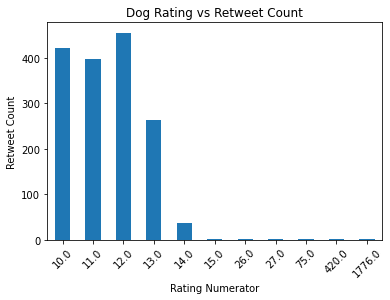

In [72]:
# Bar chart for doge rating and retweet count
dd.plot(kind='bar',  xlabel = 'Rating Numerator', ylabel = 'Retweet Count', title = 'Dog Rating vs Retweet Count')
plt.xticks(rotation = 45);

**This shows that less than 14.0 ratings seems to have a higher number of retweets more than the higher categories of rating**

### Research Question 4:
>
>**What is the total count of favorite on each rating?**

In [73]:
# Grouping the rating by the favorite count
dfd = df_dogs.groupby('rating_numerator')['favorite_count'].size()

# Test
dfd

rating_numerator
10.0      421
11.0      397
12.0      455
13.0      264
14.0       37
15.0        1
26.0        1
27.0        1
75.0        1
420.0       1
1776.0      1
Name: favorite_count, dtype: int64

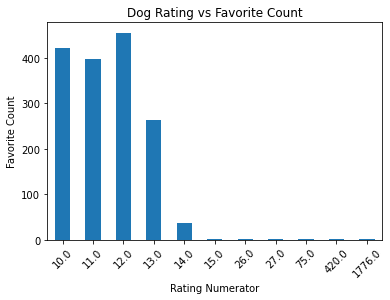

In [74]:
# Bar chart for doge rating and favorite count
dfd.plot(kind='bar',  xlabel = 'Rating Numerator', ylabel = 'Favorite Count', title = 'Dog Rating vs Favorite Count')
plt.xticks(rotation = 45);

**It seems both the retweet and favorite count are going in the same direction. Which means, the lower the rating, the higher the number of favorite and retweet count**

### Research Question 5:
>
>**Is there any correlation between any of the variables?**

In [75]:
# Correlation betwwen retweet and favorite count column
corr = df_dogs[['retweet_count', 'favorite_count', 'rating_numerator']].corr()

# Test
corr

,retweet_count,favorite_count,rating_numerator
retweet_count,1.000000,0.913084,0.008364
favorite_count,0.913084,1.000000,0.002094
rating_numerator,0.008364,0.002094,1.000000


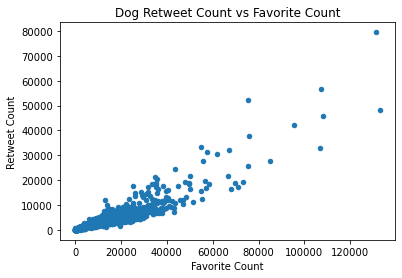

In [76]:
# Scatter plot for the favorite and retweet count column
df_dogs.plot(kind='scatter', x = 'favorite_count', y = 'retweet_count')
plt.xlabel('Favorite Count'),
plt.ylabel('Retweet Count'),
plt.title('Dog Retweet Count vs Favorite Count');

**This shows that theres a strong positive correlation between the retweet and favorite count. which means that, the higher the tweet status is been liked (favorite), the higher the chances of the tweet been retweeted**